<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Unzip-the-data" data-toc-modified-id="Unzip-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Unzip the data</a></span></li></ul></li><li><span><a href="#SIFT" data-toc-modified-id="SIFT-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>SIFT</a></span><ul class="toc-item"><li><span><a href="#Store-all-local-descriptors" data-toc-modified-id="Store-all-local-descriptors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Store all local descriptors</a></span></li><li><span><a href="#Read-a-single-local-descriptor" data-toc-modified-id="Read-a-single-local-descriptor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Read a single local descriptor</a></span></li></ul></li><li><span><a href="#Feature-matching" data-toc-modified-id="Feature-matching-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature matching</a></span></li></ul></div>

Before you run this notebook, please make sure the Runtime type is in GPU: *Runtime* --> *Change runtime type* --> *GPU*.

Note, we need to utilize opencv version Python version 4.4 or above in order to run SIFT algorithm properly.
- Ref: https://stackoverflow.com/questions/64474059/how-to-use-sift-and-surf-algorithm-in-google-colab-with-opencv4

# Setup

In [1]:
!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip -V

/bin/bash: line 1: /home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip: Is a directory


In [47]:
# setup to see the execution time in each cell

!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install ipython-autotime
!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install directory_structure
!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install handcalcs
!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install pytz
!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install skimage
# !/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install opencv-contrib-python==4.4.0.44
# %load_ext autotime

/bin/bash: line 1: /home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip: Is a directory
/bin/bash: line 1: /home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip: Is a directory
/bin/bash: line 1: /home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip: Is a directory
/bin/bash: line 1: /home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip: Is a directory
/bin/bash: line 1: /home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip: Is a directory


In [3]:
# %%time

import pandas as pd
import os
import random
import glob
import PIL
from PIL import Image
import numpy as np
# import cupy as cp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
# from google.colab.patches import cv2_imshow
# from directory_structure import Tree
import shutil
import handcalcs.render
import pickle

In [4]:
print (cv2.__version__)

4.5.5


# Preprocessing

Use this if you are using Google Colab.

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# replace the dir if needed

ROOT_DIR = "/home/hui/Projects/g5/datasets/cv2"  # Henry's dir
# ROOT_DIR = "/content/drive/MyDrive/Project - G5/Dataset/"    #Lejia's dir
# ROOT_DIR = "/content/drive/MyDrive/Project - G5/Dataset/" #Nan's dir
# ROOT_DIR = "/content/drive/MyDrive/Project - G5/Dataset"

SAVE_DE_DIR = "/home/hui/Projects/g5/datasets/descriptors"

## Unzip the data

In [7]:
os.chdir(ROOT_DIR)
print("Current dir: {}".format(os.getcwd()))

Current dir: /home/hui/Projects/g5/datasets/cv2


In [8]:
# print(Tree(os.getcwd()))

# SIFT

In [9]:
def sift_descriptor(file_path, write_sample=False):
    # read the file as opencv obj
    img = cv2.imread(file_path)
    #     img=mpimg.imread(file_path)

    # convert the image into gray scale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # create a sift obj
    sift = cv2.SIFT_create()

    # compute the keypoints and the local descriptor
    keypoints_, descriptors_ = sift.detectAndCompute(img_gray, None)

    # are you write a sample of SIFT img?
    if write_sample:
        # draw the keypoints of the img
        img_kp = cv2.drawKeypoints(img_gray, keypoints_, img)

        # write the img with keypoints to disk
        cv2.imwrite(ROOT_DIR + '/sample1_sift_kp.jpg', img_kp)

    return keypoints_, descriptors_

In [10]:
# os.chdir(ROOT_DIR+"/unzip")

# all_folders = os.listdir(os.getcwd())

# os.chdir("./" + all_folders[0])
# all_files = os.listdir(os.getcwd())

# random_sample_index = random.randint(0, len(all_files))

# sample_img_path = all_files[random_sample_index]

In [11]:
# sift_descriptor(sample_img_path, write_sample=True)

In [12]:
# target file path
img1 = ROOT_DIR + "/Hot Red Bean Soup.png"
img2 = ROOT_DIR + "/Double Taro Signature.png"

In [13]:
kp1, de1 = sift_descriptor(img1)
kp2, de2 = sift_descriptor(img2)

print("Retrieved all kp and local descriptors!")

Retrieved all kp and local descriptors!


## Store all local descriptors

In [15]:
# specify a location where the local descriptor is going to be stored
if not os.path.exists(SAVE_DE_DIR):
    os.mkdir(SAVE_DE_DIR)

# change to the right dir
os.chdir(ROOT_DIR)

# get a list of all file names
files = os.listdir(os.getcwd())

DE_RESULT = list()

# compute local descriptor for all images
for file in files:
    kp, de = sift_descriptor(file)
    DE_RESULT.append(de)

# write all local descriptor into a file
for i in range(len(files)):
    # save the descriptor as a txt file and remove the 'jpg' and 'png' file extension
    with open(SAVE_DE_DIR + '/' + str(files[i].split('.')[0]) + '.txt', 'wb') as f:
        pickle.dump(DE_RESULT[i], f)

print(">>> All operations are done!")

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


>>> All operations are done!


## Read a single local descriptor

In [14]:
def retrieve_stored_descriptor(product_name: str):
    # retrieve a stored local descriptor based on given name
    try:
        file_path = SAVE_DE_DIR + "/" + product_name + ".txt"
        file = open(file_path, 'rb')
        descriptor = pickle.load(file)
        file.close()
        return descriptor
    except FileNotFoundError:
        print("Wrong file name or path")
        return None
    except e:
        print("Error due to: {}".format(e))
        return None

Sample

In [15]:
product_name = "Boba Tofu Pudding"
print(retrieve_stored_descriptor(product_name))

[[37.  8.  0. ...  0.  0.  1.]
 [ 0.  1.  1. ...  0.  0.  0.]
 [ 0.  1. 14. ...  0.  0.  2.]
 ...
 [22.  1.  0. ...  6.  6. 35.]
 [ 1.  5.  2. ...  0.  0.  0.]
 [ 5.  0.  0. ... 11.  1.  1.]]


In [16]:
# retrieve_stored_descriptor(product_name).shape

In [17]:
# import numpy as np
# import matplotlib.pyplot as plt

# plt.rcParams["figure.figsize"] = [20, 60]
# plt.rcParams["figure.autolayout"] = True

# fig, ax = plt.subplots()
# min_val, max_val = 0, 10  #subsitute this with col and row number of the descriptor matrix
# matrix = retrieve_stored_descriptor(product_name)
# ax.matshow(matrix, cmap='ocean')

# for i in range(max_val):
#     for j in range(max_val):
#         c = matrix[j, i]
#         ax.text(i, j, str(c), va='center', ha='center')

# Feature matching

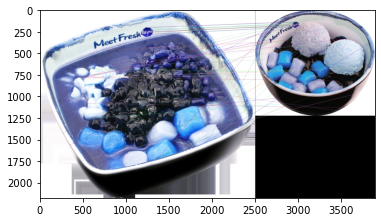

(<matplotlib.image.AxesImage at 0x7fdf034c9540>, None)

In [18]:
# feature matching

# instantiate a Brute-force matcher with L1 norm
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# match the two descriptors
matches = bf.match(de1, de2)

# sort the match result based on feature vector distance
matches = sorted(matches, key=lambda x: x.distance)

# draw the match image (cross reference) and then display it
img3 = cv2.drawMatches(cv2.imread(img1),
                       kp1,
                       cv2.imread(img2),
                       kp2,
                       matches[:50],
                       cv2.imread(img2),
                       flags=2)
# img=mpimg.imread('stinkbug.png')
plt.imshow(img3), plt.show()

In [19]:
dir(matches[0])

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'distance',
 'imgIdx',
 'queryIdx',
 'trainIdx']

In [20]:
def match_products(product_1, product_2):
    # instantiate a Brute-force matcher with L1 norm
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    # match the two descriptors
    matches = bf.match(retrieve_stored_descriptor(product_1), retrieve_stored_descriptor(product_2))

    # sort the match result based on feature vector distance
    matches = sorted(matches, key=lambda x: x.distance)
    
    return matches

In [21]:
PRODUCT_NAME_1 = "Fluffy Green Tea"
PRODUCT_NAME_2 = "Fluffy Jin Xuan Tea"

index = 1

print("Feature {} distance is {}".format(index, match_products(PRODUCT_NAME_1, PRODUCT_NAME_2)[1].distance))

Feature 1 distance is 522.0


In [22]:
retrieve_stored_descriptor(PRODUCT_NAME_1).shape

(56, 128)

In [23]:
retrieve_stored_descriptor(PRODUCT_NAME_2).shape

(37, 128)

A list of things we need to consider here:
- Mean
- Median

- Distance formula (Euclidean distance)

- Visualization (feature matrix)

- Clustering

In [24]:
# attempt of using the mean of the all distances
from numpy import mean, median

matches_results = [item.distance for item in match_products(PRODUCT_NAME_1, PRODUCT_NAME_2)]

dist_mean = mean(matches_results)
dist_median = median(matches_results)
    
print("Mean: {}".format(dist_mean))
print("Median: {}".format(dist_median))

Mean: 1163.851851851852
Median: 1079.0


In [25]:
temp = {
    "matches": matches_results
}
df = pd.DataFrame(temp)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   matches  27 non-null     float64
dtypes: float64(1)
memory usage: 344.0 bytes


Text(0.5, 0, 'Feature Match Distance')

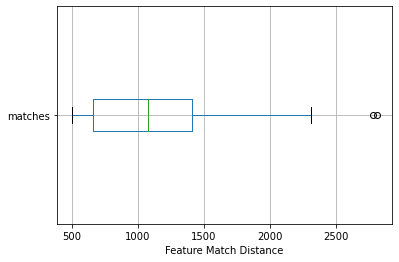

In [26]:
# ax = (df["matches"]).plot.box()
ax = df.boxplot(column=["matches"], vert=False)
ax.set_xlabel("Feature Match Distance")

In [29]:
def comparable_ovr(target_, return_mode=-1, sort=False):
    '''
    Comparing one-vs-rest product. aka, one vs all other products on the records.

    INPUTS:
        target_: str
            target product name
        return_mode: int
            what kind of list you want to have as return.
            -1: just the mean
            0: both the mean and median (two lists)
            1: just the median
        sort: boolean
            sort the return result in ASC or DESC
            False: return in ASC
            True: return in DESC

    OUTPUTS:
        results: list
            The desired results from the computation based on the given return mode value.
            If the return mode is in the incorrect number, it will return None.
    '''

    ACCEPTED_RETURN_MODE = [-1, 0, 1]

    if return_mode not in ACCEPTED_RETURN_MODE:
        return None

    # get a full list of the products
    stored_descriptors = os.listdir(SAVE_DE_DIR)

    results_mean = list()
    results_median = list()

    # go through all products
    for i in range(len(stored_descriptors)):

        # if it is the product itself, simply skip it
        if stored_descriptors[i] == target_:
            pass

        # compute the match
        matches_results_listing = [item.distance for item in match_products(
            target_, stored_descriptors[i].split(".")[0])]

        # store the mean and median results
        results_mean.append(mean(matches_results_listing))
        results_median.append(median(matches_results_listing))
    # end for

    # sort the results
    if sort:
        results_mean.sort(reverse=True)
        results_median.sort(reverse=True)

    if return_mode == -1:
        return results_mean
    elif return_mode == 0:
        return results_mean, results_median
    else:
        return results_median

<b>Testing</b>

Give a product name, match it against the other products, and then plot the mean and median based on the "comparable_ovr" func. The less the distance is, the closer the two products look alike.

Text(0.5, 0, 'Feature Match Distance (mean)')

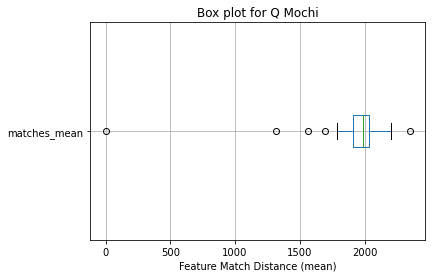

In [30]:
test_product = "Q Mochi"

results_mean, results_median = comparable_ovr(test_product, return_mode=0, sort=True)

temp = {
    "matches_mean": results_mean,
    "matches_median": results_median,
}
df2 = pd.DataFrame(temp)

ax = df2.boxplot(column=["matches_mean"], vert=False)
ax.set_title("Box plot for " + test_product)
ax.set_xlabel("Feature Match Distance (mean)")

Text(0.5, 0, 'Feature Match Distance (median)')

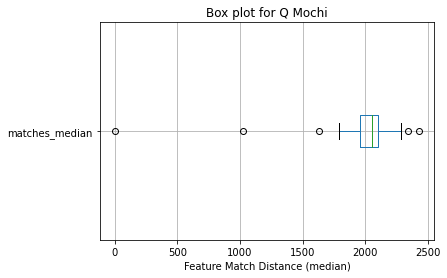

In [31]:
ax = df2.boxplot(column=["matches_median"], vert=False)
ax.set_title("Box plot for " + test_product)
ax.set_xlabel("Feature Match Distance (median)")

In [35]:
print(dir(retrieve_stored_descriptor(test_product)))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '

In [49]:
retrieve_stored_descriptor(test_product).shape

(2503, 128)

In [45]:
retrieve_stored_descriptor(test_product).view()

array([[ 50.,  44.,   4., ...,   0.,   0.,   0.],
       [ 20.,  37.,   2., ...,   0.,  47., 103.],
       [ 15.,  20.,   7., ...,   2.,   4.,  19.],
       ...,
       [ 39.,   1.,   0., ...,   0.,  26., 102.],
       [ 46., 141.,   3., ...,   0.,   0.,   4.],
       [  0.,   0.,  47., ...,   0.,   0.,  12.]], dtype=float32)

In [48]:
import matplotlib.pyplot as plt
from skimage import draw

arr = retrieve_stored_descriptor(test_product)
rr, cc = draw.circle_perimeter(100, 100, radius=80, shape=arr.shape)
arr[rr, cc] = 1
plt.imshow(arr)
plt.show()

ModuleNotFoundError: No module named 'skimage'